In [27]:
# %load rebusExtrap.py
#!/usr/bin/env python
%matplotlib inline
import os,sys,json
import numpy

years=range(2009,2019)

valDict={ 'cmsCPU' : numpy.zeros(len(years)),
          'cmsCPUT1' : numpy.zeros(len(years)),
          'cmsCPUT2' : numpy.zeros(len(years)),
          'cmsDisk' : numpy.zeros(len(years)),
          'cmsDiskT1' : numpy.zeros(len(years)),
          'cmsDiskT2' : numpy.zeros(len(years)),
          'cmsTape' : numpy.zeros(len(years)),
          'cmsTapeT1' : numpy.zeros(len(years))
}

units={'CPU': 1.e6,'Disk':1.e3,'Tape':1.e3}

In [28]:
for year in years:
    j=json.load(open(str(year)+'.json'))
    for pledge in j:
        if 'CMS' not in pledge: continue
        v=pledge['CMS']
        if not isinstance(v, int):
            continue

        pType= pledge['PledgeType']
        pTier= pledge['Tier'].split()[1]

        att = 'cms' + pType
        att2=None
        if pTier != "0": att2=att+'T'+pTier

        valDict[att][year-years[0]]=valDict[att][year-years[0]]+v/units[pType]
        if att2 is not None:
            valDict[att2][year-years[0]]=valDict[att2][year-years[0]]+v/units[pType]

In [29]:
import scipy.optimize
import math

fitDict={}
expDict={}
boundsDict={}
expYear=2030
exponentDict={}

func= lambda t,a,b: a*numpy.power(1+b,t)

allYears=numpy.arange(years[0],expYear+1)

for key in valDict:
    x=range(0,len(years))
    fit=scipy.optimize.curve_fit(func,  x,  valDict[key])
    #print key,fit[0]
    
    fitDict[key]=numpy.zeros(len(years))
    expDict[key]=numpy.zeros(expYear+1-years[-1])
    for i,y in enumerate(years):
        fitDict[key][i]=fit[0][0]*numpy.power(1+fit[0][1],y-years[0])
    for i,y in enumerate(range(years[-1],expYear+1)):
        expDict[key][i]=fit[0][0]*numpy.power(1+fit[0][1],y-years[0])

    sigma_ab = numpy.sqrt(numpy.diagonal(fit[1]))

    from uncertainties import ufloat
    a = ufloat(fit[0][0], sigma_ab[0])
    b = ufloat(fit[0][1], sigma_ab[1])
    print key,'a is',a,'b is',str(b)
    exponentDict[key]=str(b)
    bound_upper = func(allYears-years[0], *(fit[0] + sigma_ab))
    bound_lower = func(allYears-years[0], *(fit[0] - sigma_ab))
    boundsDict[key]=[bound_lower,bound_upper]
    #print bound_lower,bound_upper

cmsDiskT1 a is 9.7+/-1.3 b is 0.207+/-0.022
cmsDisk a is 24.9+/-2.5 b is 0.215+/-0.016
cmsCPUT2 a is 0.188+/-0.014 b is 0.198+/-0.013
cmsCPUT1 a is 0.065+/-0.009 b is 0.279+/-0.023
cmsTape a is 25+/-4 b is 0.293+/-0.027
cmsDiskT2 a is 12.8+/-1.3 b is 0.196+/-0.017
cmsTapeT1 a is 17.1+/-2.8 b is 0.284+/-0.027
cmsCPU a is 0.312+/-0.029 b is 0.230+/-0.015


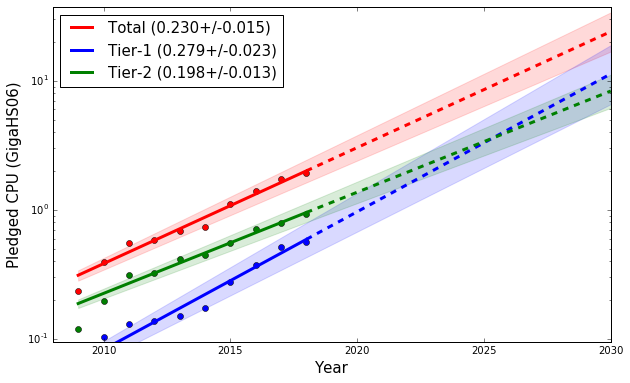

In [30]:
import pylab
expYears=range(years[-1],expYear+1)
pylab.rcParams['figure.figsize'] = 10, 6
pylab.figure(1)#,figsize=(6,4))
key='cmsCPU'
pylab.semilogy(years,valDict[key],'ro')
h,=pylab.semilogy(years,fitDict[key],'r',linewidth=3)
pylab.semilogy(expYears,expDict[key],'r--',linewidth=3)
pylab.fill_between(allYears, boundsDict[key][0],boundsDict[key][1],
                   color = 'red', alpha = 0.15)

key='cmsCPUT1'
pylab.semilogy(years,valDict[key],'bo')
h1,=pylab.semilogy(years,fitDict[key],'b',linewidth=3)
pylab.semilogy(expYears,expDict[key],'b--',linewidth=3)
pylab.fill_between(allYears, boundsDict[key][0],boundsDict[key][1],
                   color = 'blue', alpha = 0.15)

key='cmsCPUT2'
pylab.semilogy(years,valDict[key],'go')
h2,=pylab.semilogy(years,fitDict[key],'g',linewidth=3)
pylab.semilogy(expYears,expDict[key],'g--',linewidth=3)
pylab.fill_between(allYears, boundsDict[key][0],boundsDict[key][1],
                   color = 'green', alpha = 0.15)

pylab.ylim(ymin=valDict['cmsCPUT2'][0]*0.8,ymax=1.1*boundsDict['cmsCPU'][1][-1])
pylab.xlim(xmin=years[0]-1)
pylab.xlabel('Year',fontsize=15)
pylab.ylabel('Pledged CPU (GigaHS06)',fontsize=15)
pylab.legend([h,h1,h2],['Total ('+exponentDict['cmsCPU']+')',
                        'Tier-1 ('+exponentDict['cmsCPUT1']+')',
                        'Tier-2 ('+exponentDict['cmsCPUT2']+')'],
             loc='best',fontsize=15)

ax=pylab.gca()
#ax.ticklabel_format(useOffset=False)
pylab.savefig('rebusCPUExtrap')

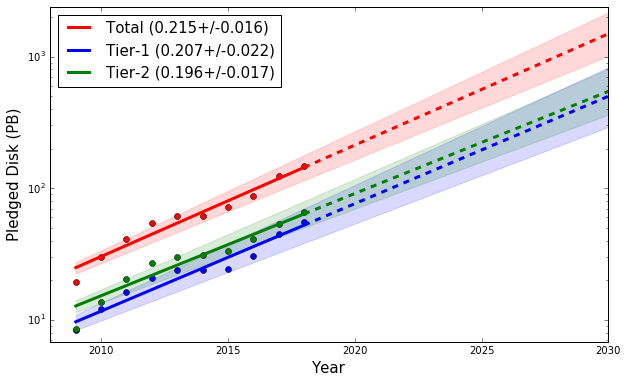

In [31]:
pylab.figure(2)
key='cmsDisk'
pylab.semilogy(years,valDict[key],'ro')
h,=pylab.semilogy(years,fitDict[key],'r',linewidth=3)
pylab.semilogy(expYears,expDict[key],'r--',linewidth=3)
pylab.fill_between(allYears, boundsDict[key][0],boundsDict[key][1],
                   color = 'red', alpha = 0.15)

key='cmsDiskT1'
pylab.semilogy(years,valDict[key],'bo')
h1,=pylab.semilogy(years,fitDict[key],'b',linewidth=3)
pylab.semilogy(expYears,expDict[key],'b--',linewidth=3)
pylab.fill_between(allYears, boundsDict[key][0],boundsDict[key][1],
                   color = 'blue', alpha = 0.15)

key='cmsDiskT2'
pylab.semilogy(years,valDict[key],'go')
h2,=pylab.semilogy(years,fitDict[key],'g',linewidth=3)
pylab.semilogy(expYears,expDict[key],'g--',linewidth=3)
pylab.fill_between(allYears, boundsDict[key][0],boundsDict[key][1],
                   color = 'green', alpha = 0.15)

pylab.ylim(ymin=valDict['cmsDiskT2'][0]*0.8,ymax=1.1*boundsDict['cmsDisk'][1][-1])

pylab.xlim(xmin=years[0]-1)
pylab.xlabel('Year',fontsize=15)
pylab.ylabel('Pledged Disk (PB)',fontsize=15)
pylab.legend([h,h1,h2],['Total ('+exponentDict['cmsDisk']+')',
                        'Tier-1 ('+exponentDict['cmsDiskT1']+')',
                        'Tier-2 ('+exponentDict['cmsDiskT2']+')'],
             loc='best',fontsize=15)


ax=pylab.gca()
#ax.ticklabel_format(useOffset=False)
pylab.savefig('rebusDiskExtrap')

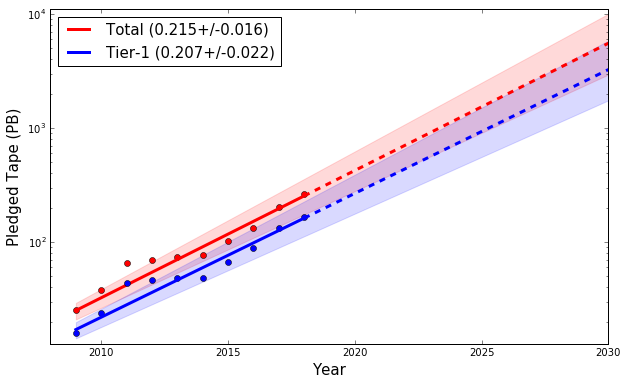

In [32]:
pylab.figure(3)
key='cmsTape'
pylab.semilogy(years,valDict[key],'ro')
h,=pylab.semilogy(years,fitDict[key],'r',linewidth=3)
pylab.semilogy(expYears,expDict[key],'r--',linewidth=3)
pylab.fill_between(allYears, boundsDict[key][0],boundsDict[key][1],
                   color = 'red', alpha = 0.15)

key='cmsTapeT1'
pylab.semilogy(years,valDict[key],'bo')
h1,=pylab.semilogy(years,fitDict[key],'b',linewidth=3)
pylab.semilogy(expYears,expDict[key],'b--',linewidth=3)
pylab.fill_between(allYears, boundsDict[key][0],boundsDict[key][1],
                   color = 'blue', alpha = 0.15)

#pylab.ylim(ymin=0.)
pylab.ylim(ymin=valDict['cmsTapeT1'][0]*0.8,ymax=1.1*boundsDict['cmsTape'][1][-1])
pylab.xlim(xmin=years[0]-1)
pylab.xlabel('Year',fontsize=15)
pylab.ylabel('Pledged Tape (PB)',fontsize=15)
pylab.legend([h,h1],['Total ('+exponentDict['cmsDisk']+')',
                     'Tier-1 ('+exponentDict['cmsDiskT1']+')'],
             loc='best',fontsize=15)

ax=pylab.gca()
#ax.ticklabel_format(useOffset=False)

pylab.savefig('rebusTapeExtrap')
